In [17]:
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Activation, Dropout
from keras.optimizers import RMSprop, Adam
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K
from sklearn.model_selection import train_test_split


In [35]:
data_set = pd.read_csv("prima_indians.csv")
# print(data_set.head())
# print(data_set.columns)
y = data_set.pop(" Class")
x = data_set
x -= np.mean(x, axis = 0)
print(x.head())
# print(x.columns)


   number of time pregnant   plasma glucose   diastolic blood pressure  \
0                 2.154948        27.105469                   2.894531   
1                -2.845052       -35.894531                  -3.105469   
2                 4.154948        62.105469                  -5.105469   
3                -2.845052       -31.894531                  -3.105469   
4                -3.845052        16.105469                 -29.105469   

    tricepts skinfold thickness   2 hour serum insulin        BMI  \
0                     14.463542             -79.799479   1.607422   
1                      8.463542             -79.799479  -5.392578   
2                    -20.536458             -79.799479  -8.692578   
3                      2.463542              14.200521  -3.892578   
4                     14.463542              88.200521  11.107422   

    Diabetes pedigree function        Age  
0                     0.155124  16.759115  
1                    -0.120876  -2.240885  
2       

In [36]:
# y = data_set.pop(" Class")
# x = data_set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
X_train = np.array(x_train).astype('float32')
X_test = np.array(x_test).astype('float32')
Y_train = keras.utils.to_categorical(y_train, 2)
Y_test = keras.utils.to_categorical(y_test, 2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(537, 8) (231, 8) (537, 2) (231, 2)


In [44]:
NB_EPOCH = 100
BATCH_SIZE = 512
VERBOSE = 0
NB_CLASSES = 2   # number of outputs = number of digits
OPTIMIZER = 'RMSprop'
RESHAPED = len(x_test.columns)
print(RESHAPED)


model = Sequential()
model.add(Dense(1000, input_dim=RESHAPED, kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.02)))
# model.add(Dropout(0.1))
model.add(Activation('sigmoid'))
model.add(Dense(2)) 
model.add(Activation('softmax'))
# model.summary() 

model.compile(loss='mean_squared_error',optimizer=OPTIMIZER, metrics=['accuracy']) 

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, #EPOCHS
                    verbose=VERBOSE,
                    validation_data=(X_test, Y_test))
                    #callbacks=[tfcall]) #For Tensorboard
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8
Test loss: 0.20281976074367375
Test accuracy: 0.7272727276597705


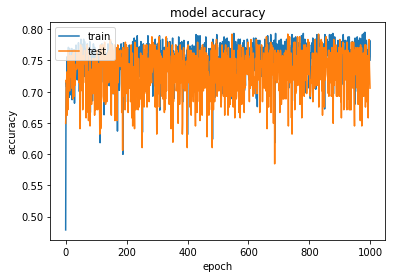

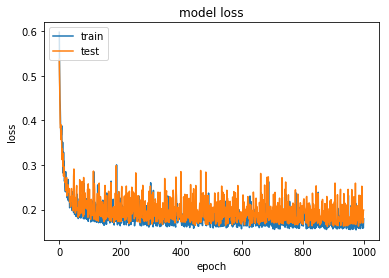

In [42]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
